In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
import numpy as np
import os
from sklearn import svm
import matplotlib.pyplot as plt


In [3]:
def create_df(path):
    list_df = []
    list_files = os.listdir(path)

    path_list = [path + item for item in list_files if item != '.DS_Store']
    path_list.sort()
    for item in path_list:
        print(item)
        temp_df = pd.read_csv(item, low_memory=False)
        list_df.append(temp_df)
    final = pd.concat(list_df)
    return final

def create_equal_representation(df):
    malicious = df.loc[df['malicious'] == 1]

    non_mal = df.loc[df['malicious'] == 0]
    non_mal_sample = non_mal.sample(len(malicious))

    return pd.concat([malicious, non_mal_sample], ignore_index= True)

path = '/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/'

df = create_df(path)

need_name = create_equal_representation(df)

/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x098b716b8aaf21512996dc57eb0615e2383e2f96.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x3035b2e90D83c1C07C1F8A21e4cb27e8E8A0a00e.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x3E0DeFb880cd8e163baD68ABe66437f99A7A8A74.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x6162759eDAd730152F0dF8115c698a42E666157F.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x629e7Da20197a5429d30da36E77d06CdF796b71A.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x711C0139ABA68542A768f24964a801a93500D24D.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0xD5376Cac7471133380A055b9D1F1C612bb68c10D.csv


(array([619.,  10.,   0.,   2.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([    0.        ,  2656.38888889,  5312.77777778,  7969.16666667,
        10625.55555556, 13281.94444444, 15938.33333333, 18594.72222222,
        21251.11111111, 23907.5       , 26563.88888889, 29220.27777778,
        31876.66666667, 34533.05555556, 37189.44444444, 39845.83333333,
        42502.22222222, 45158.61111111, 47815.        , 50471.38888889,
        53127.77777778, 55784.16666667, 58440.55555556, 61096.94444444,
        63753.33333333, 66409.72222222, 69066.11111111, 71722.5       ,
        74378.88888889, 77035.27777778, 79691.66666667, 82348.05555556,
        85004.44444444, 87660.83333333, 90317.22222222, 92973.61111111,
        95630.        ]),
 <BarContainer object of 36 artists>)

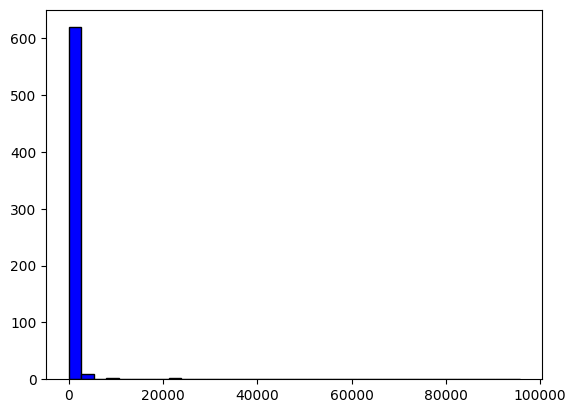

In [4]:
plt.hist(need_name['value'], color = 'blue', edgecolor = 'black',
    bins = int(180/5))

(array([549.,  19.,   7.,  10.,   6.,   6.,   5.,   6.,   1.,   3.,   2.,
          0.,   1.,   0.,   4.,   3.,   1.,   0.,   2.,   0.,   1.,   0.,
          1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

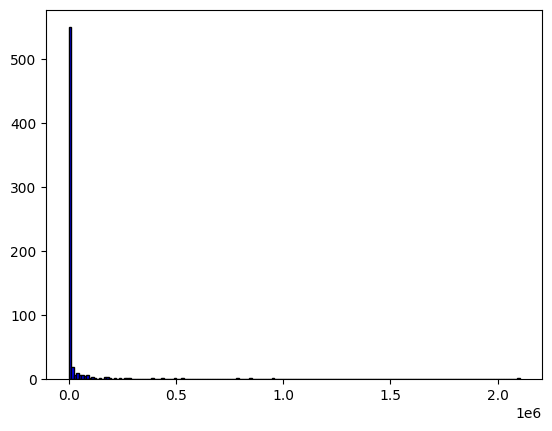

In [5]:
plt.hist(need_name['time_b/w_trans'], color = 'blue', edgecolor = 'black',
    bins = int(180))

Both of the visuals above demonstrate that a large number of data is skewed to the left. This is the most why the random forest model were printing 100% accuarcy when performing a cross validation test. As a result, value and time between transactions need to be normalized to fit the model.

As a result, I will be using sk-learn's Normalizer class to fit the columns between 0 and 1 to help fix the model.


In [35]:
scalar = preprocessing.Normalizer().fit_transform(need_name[['value', 'time_b/w_trans']])
temp = need_name[['type_of_trans', 'malicious']].to_numpy()

combined = np.concatenate((scalar, temp), axis = 1)


normalized = pd.DataFrame(combined)
normalized = normalized.rename(columns = {
    0: 'value',
    1: 'time_b/w_trans',
    2: 'type_of_trans',
    3: 'malicious'
    })

0      9.130569e-01
1      9.916172e-01
2      9.992879e-01
3      9.944178e-01
4      1.000000e+00
           ...     
633    0.000000e+00
634    5.411619e-07
635    0.000000e+00
636    1.000000e+00
637    0.000000e+00
Name: value, Length: 638, dtype: float64


In [38]:
X = normalized[['value', 'time_b/w_trans', 'type_of_trans']].to_numpy()
y = normalized['malicious'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = RandomForestClassifier(n_estimators=3, random_state=0)

scores = cross_val_score(model, X, y, cv=10)

print(scores)

[0.71875    0.90625    0.984375   0.953125   0.953125   0.96875
 0.921875   0.921875   1.         0.92063492]


Compared to the first graph there is much more variation in the score presented by the cross validation test. This well help prove the legitamcy of the model.